### Tomar una base de datos de esta pagina: 
## https://www.cryptodatadownload.com/data/binance/

# Importando Librerías

In [ ]:
pip install forex_python
pip install fbprophet

     |████████████████████████████████| 130 kB 5.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from fbprophet import Prophet 
from fbprophet.plot import plot_plotly
from forex_python.converter import CurrencyRates
import datetime
from os import remove
import glob


In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation
    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [ ]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
c = CurrencyRates()
dolarpeso=c.get_rate('USD', 'MXN', yesterday)
tiempo_usados= 2160
forecast_col = 'close'
forecast_out = 5
test_size = 0.2
periodo_p=336

## Decomentar si se usa en Google Colab

In [ ]:
#from google.colab import files
#uploaded = files.upload() # Use to load data on Google Colab
#targetPattern = r"/content/*.csv"

Saving Binance_XRPUSDT_1h.csv to Binance_XRPUSDT_1h.csv


In [ ]:
def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += ele  
    return str1 
targetPattern = r"/content/*.csv"
archivo=glob.glob(targetPattern)
archivo=listToString(archivo)


# Entendiendo la base de datos

In [ ]:
df = pd.read_csv(archivo, skiprows=1)
remove(archivo)
df

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
0,1638748800000,2021-12-06 00:00:00,XRP/USDT,0.80450,0.80490,0.78770,0.78770,4380568.0,3.486691e+06,6209
1,1638745200000,2021-12-05 23:00:00,XRP/USDT,0.80170,0.80840,0.79710,0.80450,9205841.0,7.386418e+06,15835
2,1638741600000,2021-12-05 22:00:00,XRP/USDT,0.79850,0.80190,0.78850,0.80170,11492007.0,9.143861e+06,14206
3,1638738000000,2021-12-05 21:00:00,XRP/USDT,0.79550,0.80200,0.78240,0.79840,20793581.0,1.651849e+07,21487
4,1638734400000,2021-12-05 20:00:00,XRP/USDT,0.79570,0.80140,0.78560,0.79550,13924409.0,1.106463e+07,17723
...,...,...,...,...,...,...,...,...,...,...
11763,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032
11764,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673
11765,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559
11766,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871


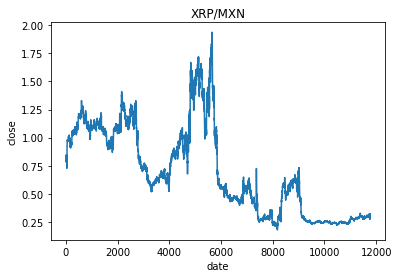

In [ ]:
close = df['close']
ax = close.plot(title='XRP/MXN')
ax.set_xlabel('date')
ax.set_ylabel('close')
plt.show()

In [ ]:
df = df.iloc[:tiempo_usados]
datos = df.reindex(index=df.index[::-1])
datos.reset_index(inplace=True, drop=True)
datos['close'] = datos['close'].apply(lambda x: x*dolarpeso)
datos

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
0,1630969200000,2021-09-06 23:00:00,XRP/USDT,1.3948,1.3967,1.3702,29.513337,25660375.0,3.549864e+07,68233
1,1630972800000,2021-09-07 00:00:00,XRP/USDT,1.3894,1.3922,1.3643,29.175592,25563778.0,3.516521e+07,39234
2,1630976400000,2021-09-07 01:00:00,XRP/USDT,1.3735,1.3797,1.3686,29.179841,11756548.0,1.615659e+07,45796
3,1630980000000,2021-09-07 02:00:00,XRP/USDT,1.3737,1.3882,1.3736,29.343402,12225354.0,1.689006e+07,23623
4,1630983600000,2021-09-07 03:00:00,XRP/USDT,1.3813,1.3855,1.3662,29.077880,11145643.0,1.532816e+07,20157
...,...,...,...,...,...,...,...,...,...,...
2155,1638734400000,2021-12-05 20:00:00,XRP/USDT,0.7957,0.8014,0.7856,16.897840,13924409.0,1.106463e+07,17723
2156,1638738000000,2021-12-05 21:00:00,XRP/USDT,0.7955,0.8020,0.7824,16.959442,20793581.0,1.651849e+07,21487
2157,1638741600000,2021-12-05 22:00:00,XRP/USDT,0.7985,0.8019,0.7885,17.029539,11492007.0,9.143861e+06,14206
2158,1638745200000,2021-12-05 23:00:00,XRP/USDT,0.8017,0.8084,0.7971,17.089016,9205841.0,7.386418e+06,15835


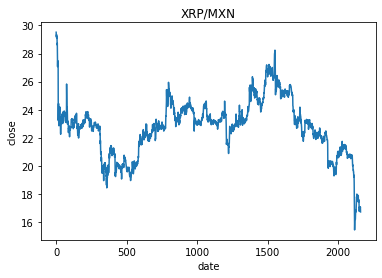

In [ ]:
close = datos['close']
ax = close.plot(title='XRP/MXN')
ax.set_xlabel('date')
ax.set_ylabel('close')
plt.show()

In [ ]:
datos_validos = datos[["date", "close"]]
datos_validos = datos_validos.rename(columns={"date" : "ds", "close" : "y" })

In [ ]:
datos_validos

,ds,y
0,2021-09-06 23:00:00,29.513337
1,2021-09-07 00:00:00,29.175592
2,2021-09-07 01:00:00,29.179841
3,2021-09-07 02:00:00,29.343402
4,2021-09-07 03:00:00,29.077880
...,...,...
2155,2021-12-05 20:00:00,16.897840
2156,2021-12-05 21:00:00,16.959442
2157,2021-12-05 22:00:00,17.029539
2158,2021-12-05 23:00:00,17.089016


In [ ]:
fbp = Prophet()
fbp.fit(datos_validos)
predict = fbp.make_future_dataframe(periods=periodo_p,freq='H')
forcast = fbp.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2486,2021-12-19 15:00:00,14.866194,10.564666,18.780913
2487,2021-12-19 16:00:00,14.857747,10.323160,19.137721
2488,2021-12-19 17:00:00,14.851381,10.421266,18.848348
2489,2021-12-19 18:00:00,14.838485,10.349312,19.052884
2490,2021-12-19 19:00:00,14.814623,10.472460,18.990470
2491,2021-12-19 20:00:00,14.788396,10.271102,18.841066
2492,2021-12-19 21:00:00,14.776629,10.344147,19.004285
2493,2021-12-19 22:00:00,14.789200,10.342048,19.148956
2494,2021-12-19 23:00:00,14.818231,10.336626,18.984649
2495,2021-12-20 00:00:00,14.843097,10.315975,19.072875


In [ ]:
plot_plotly(fbp,forcast)

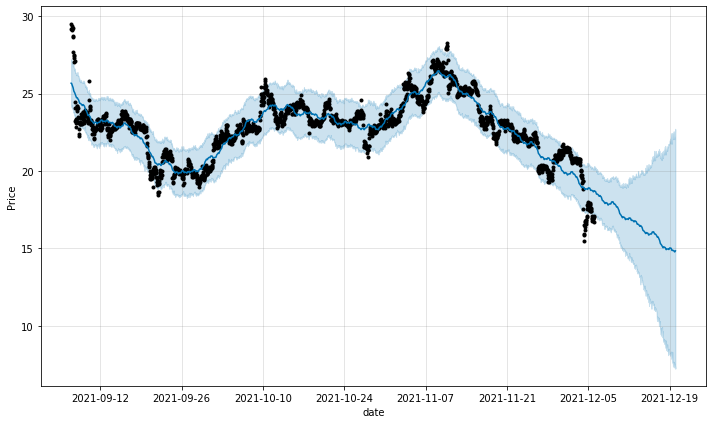

In [ ]:
graph = fbp.plot(forcast, xlabel="date", ylabel="Price")

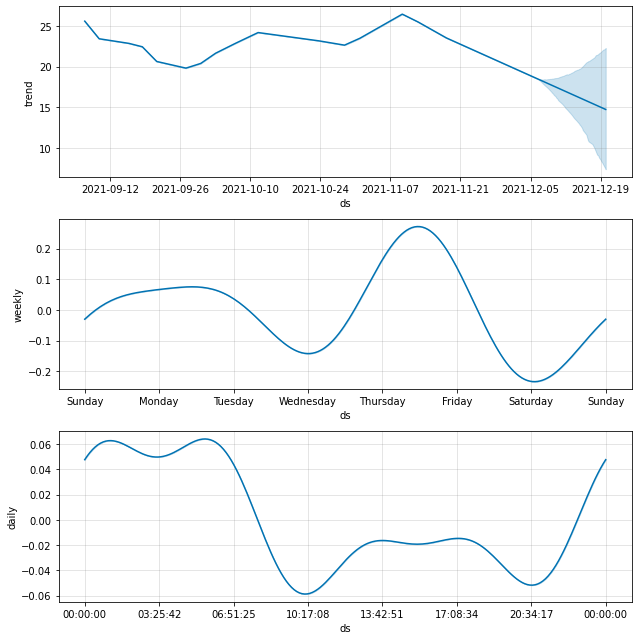

In [ ]:
graph = fbp.plot_components(forcast)